# 상점 신용카드 매출 예측 경진대회

### 2년 전 부터 2019년 2월 28일까지의 카드 거래 데이터를 이용해 2019-03-01부터 2019-05-31까지의 각 상점별 3개월 총 매출을 예측하는 것입니다.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [2]:
train = pd.read_csv("../../Data/Price prediction/train.csv")
test = pd.read_csv("../../Data/Price prediction/test.csv")

In [8]:
train[train['card_id']=='bf33518373']

,store_id,date,time,card_id,amount,installments,days_of_week,holyday


In [9]:
train

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


In [12]:
test

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-08-01,00:28:15,bf33518373,125,NaN,0,0
1,0,2016-08-01,01:09:58,7a19a3a92f,90,NaN,0,0
2,0,2016-08-01,01:47:24,6f9fd7e241,150,NaN,0,0
3,0,2016-08-01,17:54:43,8bcf1d61b2,362,NaN,0,0
4,0,2016-08-01,18:48:53,6a722ce674,125,NaN,0,0
...,...,...,...,...,...,...,...,...
473387,199,2018-03-30,14:17:59,300d7bc922,65,NaN,4,0
473388,199,2018-03-30,19:01:54,3ab757718b,65,NaN,4,0
473389,199,2018-03-30,20:08:03,2d8e9e421c,65,NaN,4,0
473390,199,2018-03-30,20:11:58,22daeb334e,200,NaN,4,0


In [11]:
test.groupby('store_id').amount.sum()

store_id
0      638257
1      427806
2      288211
3      229284
4      158572
        ...  
195    418511
196    396244
197     13963
198     92500
199    230381
Name: amount, Length: 200, dtype: int64

In [35]:
print("shape of the train:", train.shape)
print("shape of the test:", test.shape)
# 8개의 feature

shape of the train: (3362796, 8)
shape of the test: (473392, 8)


In [4]:
train.head()

# amount에서 음수 값은 취소된 거래임

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [42]:
# datetime 타입으로 변경
# is_calceled feature 추가

combine = [train, test]

for data in combine:
    data['date'] = pd.to_datetime(data['date'])
    data['is_canceled'] = data['amount'].map(lambda x: 1 if x < 0 else 0)

In [64]:
# year, month, day

combine = [train, test]

for data in combine:
    data['year'] = data['date'].dt.year      # year
    data['quarter'] = data['date'].dt.quarter  # quarter
    data['month'] = data['date'].dt.month    # month
    data['day'] = data['date'].dt.day        # day

### amount < 0

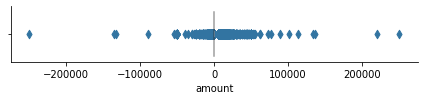

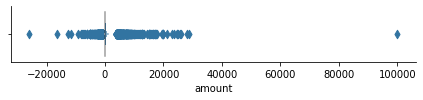

In [66]:
sns.catplot('amount', data=train, kind='boxen',
            height=1.5, aspect=4)
sns.catplot('amount', data=test, kind='boxen',
            height=1.5, aspect=4)

# train, test have negative 'amount' data.
# only a few of trades over 100000

### 총 매출액

In [151]:
grouped_store = pd.DataFrame()

# 가게의 거래 취소 횟수
grouped_store['number_of_canceled'] = train.groupby(['store_id'])['is_canceled'].sum()
# 가게의 거래 횟수(거래취소 포함)
grouped_store['number_of_trades']= train.groupby(['store_id']).size()
# 가게의 총 매출액
grouped_store['total_sales'] = train.groupby(['store_id']).amount.sum()
# 가게의 매출액 / 거래 횟수
grouped_store['store_sales_per_trades'] = train.groupby(['store_id']).amount.sum() / train.groupby(['store_id']).size()


In [152]:
grouped_store['store_id'] = grouped_store.index
grouped_store.index = np.arange(0, len(grouped_store))

In [153]:
grouped_store

,number_of_canceled,number_of_trades,total_sales,store_sales_per_trades,store_id
0,613,68773,5234611,76.114333,0
1,0,40,147950,3698.750000,1
2,53,16829,1615060,95.968863,2
3,3,383,62781,163.919060,3
4,5,2082,270312,129.832853,4
...,...,...,...,...,...
1770,131,10544,1319911,125.181241,1795
1771,2,111,15372,138.486486,1796
1772,2,82,49645,605.426829,1797
1773,10,2898,110011,37.961008,1798


In [150]:
grouped_store['number_of_canceled'].sort_values(ascending=False)

158     4875
1013    1948
0        613
218      417
932      345
        ... 
1582       0
326        0
1580       0
1578       0
1277       0
Name: number_of_canceled, Length: 1775, dtype: int64

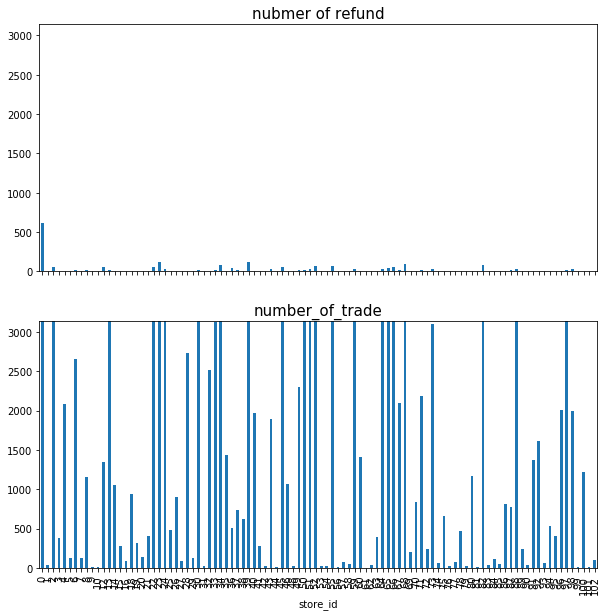

In [143]:
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, figsize=(10,10))

axes[0].set_title('nubmer of refund', fontsize=15)
axes[0].set_ylim([0, 5])
grouped_store.iloc[0:100, :].number_of_canceled.plot(kind='bar', ax=axes[0])
axes[1].set_title('number_of_trade', fontsize=15)
axes[1].set_ylim([0, 3140])
grouped_store.iloc[0:100, :].number_of_trades.plot(kind='bar', ax=axes[1])

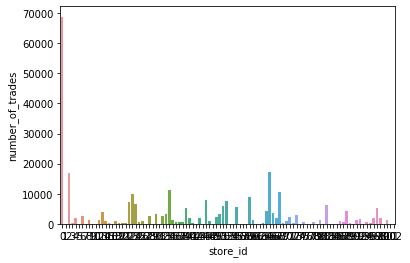

In [116]:
sns.barplot(x=grouped_store.iloc[0:100, :].index, y='number_of_trades', data=grouped_store.iloc[0:100, :])

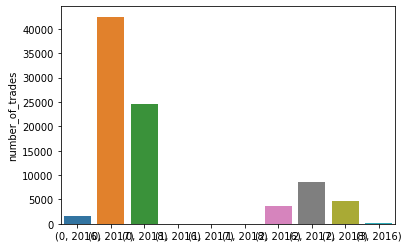

In [110]:
sns.barplot(x=grouped_store.iloc[0:10, :].index, y='number_of_trades', data=grouped_store.iloc[0:10, :])

## 년도별

In [247]:
grouped_store_year = pd.DataFrame()

# 가게의 거래 취소 횟수
grouped_store_year['number_of_canceled'] = train.groupby(['store_id', 'year'])['is_canceled'].sum()
# 가게의 거래 횟수(거래취소 포함)
grouped_store_year['number_of_trades']= train.groupby(['store_id', 'year']).size()
# 가게의 총 매출액
grouped_store_year['total_sales'] = train.groupby(['store_id', 'year']).amount.sum()
# 가게의 매출액 / 거래 횟수
grouped_store_year['store_sales_per_trades'] = train.groupby(['store_id', 'year']).amount.sum() / train.groupby(['store_id', 'year']).size()


In [249]:
grouped_store_year['store_id'] = grouped_store_year.index.get_level_values('store_id')
grouped_store_year['year'] = grouped_store_year.index.get_level_values('year')
grouped_store_year.reset_index(drop=True, inplace=True)

In [251]:
# 전체 거래 횟 수 top 100
trade_top = grouped_store_year.groupby('store_id').sum().sort_values(by='number_of_trades', ascending=False).index[:10]

In [252]:
grouped_store_year.iloc[0]

number_of_canceled            23.000000
number_of_trades            1635.000000
total_sales               137336.000000
store_sales_per_trades        83.997554
store_id                       0.000000
year                        2016.000000
Name: 0, dtype: float64

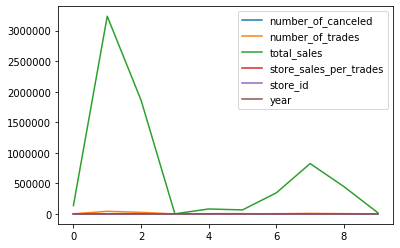

In [253]:
grouped_store_year.iloc[:10].plot()

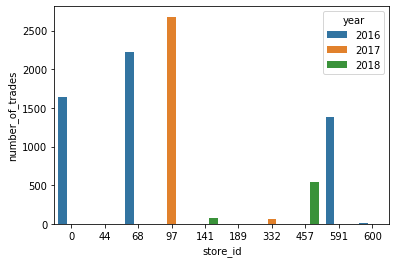

In [235]:
# 거래 횟수 상위 10
sns.barplot(x='store_id', y='number_of_trades', hue='year',
            data=grouped_store_year.)